In [ ]:
from google.colab import files
files.upload()

Saving predicted_post_covid.csv to predicted_post_covid.csv


{'predicted_post_covid.csv': b',text,label\n0,text,2\n1,"b""@Reuters Let\'s hope fares better Hagler Hank Aaron did.",1\n2,"b""I hope Australia starts producing vaccine supplies donate country\'s worth PNG cousins\\xe2\\x80\\xa6",2\n3,b\'Can talk reoccurring damn near constant anxiety fear contracting Covid-19? This fear is\\xe2\\x80\\xa6,2\n4,"b""Experts discussed COVID-19 pandemic\'s impact vaccine equity Chicago\'s Black, Hispanic, Native American comm\\xe2\\x80\\xa6",2\n5,"b\'My Covid-19 vaccination experience. I hope encourages everyone get vaccinated called so, especiall\\xe2\\x80\\xa6",2\n6,b\'Romania pauses use AstraZeneca COVID-19 vaccine batch,2\n7,"b""@FerrelAmado @TimJDillon Amado Hispanic texan really never used mask listen politics ! XD\\xe2\\x80\\xa6",2\n8,b\'Injections hope: B.C. health workers share stories first months vaccine rollout #kamloops phys\\xe2\\x80\\xa6,2\n9,b\'A bucket list hike would @kalalautrail \\xe2\\x9b\\xb0\\xf0\\x9f\\x8c\\xb4\\xf0\\x9f\\x8c\\x8a \\

In [ ]:
import pandas as pd
pre_vacc_file =  pd.read_csv('merged_data.csv',skiprows=[0,1,2])
post_vacc_file = pd.read_csv('predicted_post_covid.csv',skiprows=[1])

In [ ]:
pre_vacc_df = pd.DataFrame(pre_vacc_file)
post_vacc_df = pd.DataFrame(post_vacc_file)
del pre_vacc_df['Unnamed: 0']
del pre_vacc_df['Unnamed: 0.1']
del pre_vacc_df['Unnamed: 0.1.1']
del post_vacc_df['Unnamed: 0']

In [ ]:
pre_vacc_df.head()


,id,text,vectorized,label
0,1241045082825846785,shut rumor shutting everything happening utah ...,[0. 0. 0. ... 0. 0. 0.],1
1,1239268668841897986,praying hope wh walking septic tank toxic wast...,[0. 0. 0. ... 0. 0. 0.],0
2,1240887197114515457,profoundly sad saying goodbye child colleague ...,[0. 0. 0. ... 0. 0. 0.],1
3,1243980533521985536,hope extend safe supply beyond pandemic tainte...,[0. 0. 0. ... 0. 0. 0.],0
4,1238296258940489730,thats canadian infected making mountain molehi...,[0. 0. 0. ... 0. 0. 0.],1


In [ ]:
post_vacc_df.head()

,text,label
0,"b""@Reuters Let's hope fares better Hagler Hank...",1
1,"b""I hope Australia starts producing vaccine su...",2
2,b'Can talk reoccurring damn near constant anxi...,2
3,"b""Experts discussed COVID-19 pandemic's impact...",2
4,b'My Covid-19 vaccination experience. I hope e...,2


In [ ]:
# De-code 0,1,2 to neutral, depressed, non-depressed
pre_vacc_df['label'] = pre_vacc_df['label'].replace([0,1,2],['neutral','depressed','non-depressed'])
post_vacc_df['label'] = post_vacc_df['label'].replace([0,1,2],['neutral','depressed','non-depressed'])

In [ ]:
pre_vacc_df.head()

,id,text,vectorized,label
0,1241045082825846785,shut rumor shutting everything happening utah ...,[0. 0. 0. ... 0. 0. 0.],depressed
1,1239268668841897986,praying hope wh walking septic tank toxic wast...,[0. 0. 0. ... 0. 0. 0.],neutral
2,1240887197114515457,profoundly sad saying goodbye child colleague ...,[0. 0. 0. ... 0. 0. 0.],depressed
3,1243980533521985536,hope extend safe supply beyond pandemic tainte...,[0. 0. 0. ... 0. 0. 0.],neutral
4,1238296258940489730,thats canadian infected making mountain molehi...,[0. 0. 0. ... 0. 0. 0.],depressed


In [ ]:
post_vacc_df.head()

,text,label
0,"b""@Reuters Let's hope fares better Hagler Hank...",depressed
1,"b""I hope Australia starts producing vaccine su...",non-depressed
2,b'Can talk reoccurring damn near constant anxi...,non-depressed
3,"b""Experts discussed COVID-19 pandemic's impact...",non-depressed
4,b'My Covid-19 vaccination experience. I hope e...,non-depressed


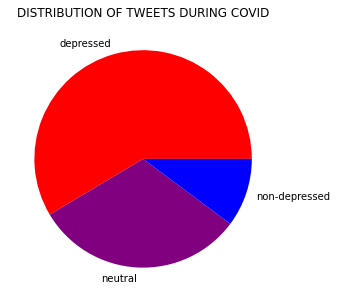

In [ ]:
pre_vacc_df['label'].value_counts().plot.pie(label = '',figsize=(5,5),colors=['red','purple','blue'],title='DISTRIBUTION OF TWEETS DURING COVID')

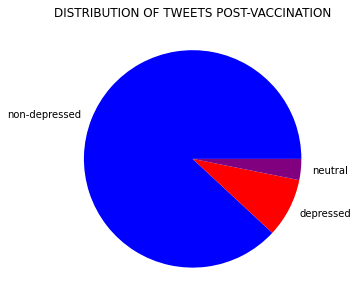

In [ ]:
post_vacc_df['label'].value_counts().plot.pie(label ='',figsize=(5,5),colors=['blue','red','purple'],title='DISTRIBUTION OF TWEETS POST-VACCINATION')

In [ ]:
import itertools
import collections
import numpy as np
pre_vacc_texts =[]
for word in pre_vacc_df['text']:
  pre_vacc_texts.append(word)
pre_vacc_words = [text.split() for text in pre_vacc_texts]
pre_vacc_words[:5]
pre_vacc_all_words = list(itertools.chain(*pre_vacc_words))
pre_vacc_word_counts = collections.Counter(pre_vacc_all_words)
pre_vacc_word_counts.most_common(15)

[('pandemic', 8057),
 ('hope', 7652),
 ('COVID', 6745),
 ('health', 6013),
 ('anxiety', 5570),
 ('mentalhealth', 4041),
 ('coronavirus', 3923),
 ('sad', 3506),
 ('help', 3506),
 ('corona', 3186),
 ('panic', 3182),
 ('get', 2791),
 ('need', 2782),
 ('I', 2780),
 ('happy', 2651)]

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
post_vacc_texts =[]
for word in post_vacc_df['text']:
  post_vacc_texts.append(word)
post_vacc_words = [text.lower().split() for text in post_vacc_texts]
post_vacc_words[:5]
post_vacc_all_words = list(itertools.chain(*post_vacc_words))
common_words = ['i','get','trump', "b'fauci",'hopes','getting','one','covid-19','i\\xe2\\x80\\x99m',"b'i",'tell','people','see','vaccine.','vaccine',"i'm",'everyone','got','&amp;','the','really','many','don\\xe2\\x80\\x99t']
post_vacc_all_word = [word for word in post_vacc_all_words if word not in common_words]
post_vacc_all_word = [word for word in post_vacc_all_word if word not in stopwords.words('english')]
post_vacc_word_counts = collections.Counter(post_vacc_all_word)
post_vacc_word_counts.most_common(15)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('covid', 107),
 ('hope', 59),
 ('supporters', 49),
 ('happy', 35),
 ('push', 20),
 ('glad', 18),
 ('urge', 17),
 ('first', 15),
 ('vaccine,', 11),
 ('dose', 10),
 ('anxiety', 9),
 ('alone', 9),
 ('vaccinated', 8),
 ('sad', 8),
 ('second', 8)]

In [ ]:
pre_vacc_freq_df = pd.DataFrame(pre_vacc_word_counts.most_common(15),columns=['tweet_word','word_count'])

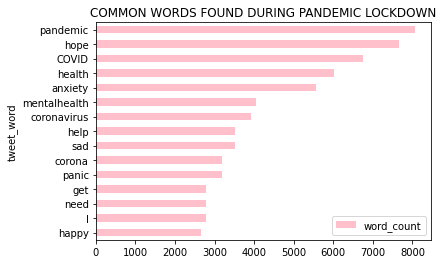

In [ ]:
pre_vacc_freq_df.sort_values(by='word_count').plot.barh(x='tweet_word',y='word_count',title='COMMON WORDS FOUND DURING PANDEMIC LOCKDOWN',color='pink')

In [ ]:
post_vacc_freq_df = pd.DataFrame(post_vacc_word_counts.most_common(15),columns=['tweet_word','word_count'])

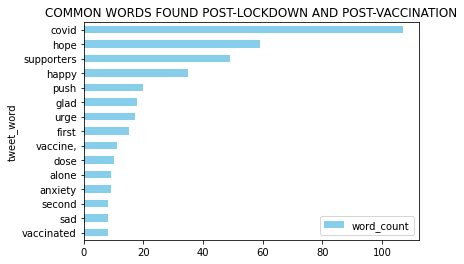

In [ ]:
post_vacc_freq_df.sort_values(by='word_count').plot.barh(x='tweet_word',y='word_count',title='COMMON WORDS FOUND POST-LOCKDOWN AND POST-VACCINATION',color='skyblue')